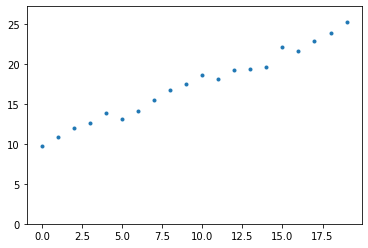

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 构造数据
x = np.arange(20)
X = np.matrix(np.r_[np.ones(20), x].reshape(2, 20))
y = (np.arange(20) + np.random.randn(20)) * 0.75 + 10
theta = np.matrix(np.ones(2))
plt.plot(x, y, '.')
plt.ylim(0, max(y)+2)
plt.show()  

我这里以斜率为0.75，截距10随机产生了20个数字，如上图，然后以步长$\alpha$为0.0001开始训练，训练过程中如果$\alpha$就会出现来回震荡，cost函数越来越大的情况, theta[0],theta[1] 分别对应解决和斜率，为了对比我拟合的准确度，我用了scipy.stats中的linregress函数，貌似我的拟合结果比linregerss拟合好好一些。

In [4]:

# 开始做theta的梯度下降，这里相当于批梯度下降    
for i in range(10000):
    theta = theta - (0.0001*(theta*X - y)*X.T)
    if i % 200 == 0:
        print((theta*X - y)*(theta*X - y).T)
print(theta)
print(stats.linregress(x, y))

[[625.32404259]]
[[367.73037776]]
[[298.03719314]]
[[241.78020354]]
[[196.36903607]]
[[159.71271752]]
[[130.1233948]]
[[106.23861713]]
[[86.95860149]]
[[71.39559279]]
[[58.8329868]]
[[48.6923339]]
[[40.50670416]]
[[33.89918738]]
[[28.56553811]]
[[24.26016661]]
[[20.78483052]]
[[17.97950676]]
[[15.71502322]]
[[13.88711096]]
[[12.41160311]]
[[11.22055939]]
[[10.25913777]]
[[9.48306926]]
[[8.85661951]]
[[8.35094342]]
[[7.94275696]]
[[7.61326504]]
[[7.34729608]]
[[7.13260345]]
[[6.95930155]]
[[6.81941064]]
[[6.7064894]]
[[6.61533831]]
[[6.5417603]]
[[6.48236745]]
[[6.43442498]]
[[6.39572537]]
[[6.36448669]]
[[6.33927053]]
[[6.31891581]]
[[6.30248529]]
[[6.28922242]]
[[6.27851651]]
[[6.2698746]]
[[6.26289877]]
[[6.25726781]]
[[6.25272245]]
[[6.2490534]]
[[6.2460917]]
[[10.12202637  0.76298728]]
LinregressResult(slope=0.7596617157570227, intercept=10.165164957427596, rvalue=0.9919758089874289, pvalue=1.272300581963253e-17, stderr=0.022820521530477846)


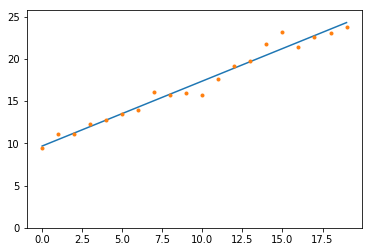

In [7]:
thetaA = theta.getA()
plt.plot(x, x*thetaA[0][1]+thetaA[0][0])
plt.plot(x, y, '.')
plt.ylim(0, max(y)+2)
plt.show()

如上图，点是原始数据，蓝色的线是通过theta绘制出来拟合的线，因为feature只有一维并且是线性拟合，所以并不需要考虑正则化和过拟合。 